In [17]:
import pandas as pd 
import http.client, urllib.request, urllib.parse, urllib.error, base64
import json
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame.from_csv(r'playerrank2017.csv',header=0)

# pd.read_csv("data/cereal.csv")
df.head(200)

C:\Users\Leanne\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys


,player,position,avgrank,overallrank,positionrank
0,Broncos,D,139.2,130,1
1,Seahawks,D,140.8,131,2
2,Chiefs,D,143.2,133,3
4,Texans,D,143.8,134,4
5,Vikings,D,145.0,135,5
6,Panthers,D,154.8,146,6
7,Cardinals,D,155.6,149,7
8,Patriots,D,157.4,151,8
9,Jaguars,D,169.4,166,9
10,Bengals,D,169.6,167,10


In [3]:
dfqb = df.loc[df['position']=='QB']
dfrb = df.loc[df['position']=='RB']
dfwr = df.loc[df['position']=='WR']


dfqb = dfqb.sort_values(by=['positionrank'])
dfrb = dfrb.sort_values(by=['positionrank'])
dfwr = dfwr.sort_values(by=['positionrank'])

dftop =df[0:5]
dftop =df[5: ]

dfqb

,player,position,avgrank,overallrank,positionrank
24,Tom Brady,QB,45.4,44,1
25,Aaron Rodgers,QB,45.8,45,2
26,Drew Brees,QB,55.8,57,3
27,Matt Ryan,QB,71.0,67,4
28,Russell Wilson,QB,85.0,79,5
29,Kirk Cousins,QB,90.2,89,6
30,Cam Newton,QB,90.2,91,7
31,Dak Prescott,QB,112.0,105,8
32,Derek Carr,QB,115.0,111,9
33,Jameis Winston,QB,116.0,113,10


In [4]:
dfrb

,player,position,avgrank,overallrank,positionrank
44,David Johnson,RB,1.6,1,1
45,Le'Veon Bell,RB,1.8,2,2
46,Ezekiel Elliott,RB,4.6,4,3
47,LeSean McCoy,RB,9.4,9,4
48,Devonta Freeman,RB,10.8,12,5
49,Melvin Gordon,RB,12.8,13,6
50,Jordan Howard,RB,16.0,15,7
51,DeMarco Murray,RB,16.4,16,8
52,Jay Ajayi,RB,19.6,18,9
53,Todd Gurley,RB,20.0,19,10


In [5]:
dfwr

,player,position,avgrank,overallrank,positionrank
127,Antonio Brown,WR,3.0,3,1
128,Odell Beckham Jr.,WR,5.6,5,2
129,Julio Jones,WR,5.6,6,3
130,Jordy Nelson,WR,7.4,7,4
131,Mike Evans,WR,8.4,8,5
132,A.J. Green,WR,9.6,10,6
133,Michael Thomas,WR,10.6,11,7
134,Brandin Cooks,WR,14.6,14,8
135,Doug Baldwin,WR,16.4,17,9
136,Amari Cooper,WR,21.4,20,10


In [6]:
dataRQB={'Name':[], 'Position':[]}
dataRWR={'Name':[], 'Position':[]}
dataRRB={'Name':[], 'Position':[]}

for i in range(1,17):
    dataRQB['Wk' + str(i)]=[]
    dataRWR['Wk' + str(i)]=[]
    dataRRB['Wk' + str(i)]=[]
    

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': 'a52c8d8f102c4d008aedaec378f5f421',
}

params = urllib.parse.urlencode({
})

In [7]:
# try: from the example code
#     conn = http.client.HTTPSConnection('api.fantasydata.net')
#     conn.request("GET", "/v3/nfl/stats/json/GameLeagueLeaders/2017/1/ALL/FantasyPoints?%s" % params, "{body}", headers)
#     response = conn.getresponse()
#     data = json.loads(response.read().decode('utf-8'))
#     #print(data[0])
#     conn.close()
# except Exception as e:
#     print("[Errno {0}] {1}".format(e.errno, e.strerror))
    
#QB
for i in range(1,17):
    conn = http.client.HTTPSConnection('api.fantasydata.net')
    conn.request("GET", "/v3/nfl/stats/json/GameLeagueLeaders/2017/"+str(i)+"/QB/FantasyPoints?%s" % params, "{body}", headers)
    response = conn.getresponse()
    dataTQB = json.loads(response.read().decode('utf-8'))
    
    points = np.zeros_like(dfqb['position'])
    
    for j in dataTQB:
        name = j['Name']
        index= np.where(dfqb['player'] == name)
        #print(len(index[0]))
        if len(index[0]) > 0:
            points[index[0][0]] = j['FantasyPoints']
            
    dfqb['Wk'+str(i)] = points

In [8]:
#RB    
for i in range(1,17):
    conn = http.client.HTTPSConnection('api.fantasydata.net')
    conn.request("GET", "/v3/nfl/stats/json/GameLeagueLeaders/2017/"+str(i)+"/RB/FantasyPoints?%s" % params, "{body}", headers)
    response = conn.getresponse()
    dataTRB= json.loads(response.read().decode('utf-8'))
    
    points = np.zeros_like(dfrb['position'])
    
    for j in dataTRB:
        name = j['Name']
        index= np.where(dfrb['player'] == name)
        #print(len(index[0]))
        if len(index[0]) > 0:
            points[index[0][0]] = j['FantasyPoints']
            
    dfrb['Wk'+str(i)] = points

In [9]:
#WR    
for i in range(1,17):
    conn = http.client.HTTPSConnection('api.fantasydata.net')
    conn.request("GET", "/v3/nfl/stats/json/GameLeagueLeaders/2017/"+str(i)+"/WR/FantasyPoints?%s" % params, "{body}", headers)
    response = conn.getresponse()
    dataTWR= json.loads(response.read().decode('utf-8'))
    
    points = np.zeros_like(dfwr['position'])
    
    for j in dataTWR:
        name = j['Name']
        index= np.where(dfwr['player'] == name)
        #print(len(index[0]))
        if len(index[0]) > 0:
            points[index[0][0]] = j['FantasyPoints']
            
    dfwr['Wk'+str(i)] = points

In [10]:
dfqb = dfqb.loc[(dfqb['Wk1'] > 0.0) & (dfqb['Wk4'] > 0.0) & (dfqb['Wk12'] > 0.0) & (dfqb['Wk14'] > 0.0)]
dfrb = dfrb.loc[(dfrb['Wk1'] > 0.0) & (dfrb['Wk4'] > 0.0) & (dfrb['Wk12'] > 0.0) & (dfrb['Wk14'] > 0.0)]
dfwr = dfwr.loc[(dfwr['Wk1'] > 0.0) & (dfwr['Wk4'] > 0.0) & (dfwr['Wk12'] > 0.0) & (dfwr['Wk14'] > 0.0)]

In [42]:
dfqb5 = dfqb.iloc[:5] 
dfqbF = dfqb.iloc[5:]

dfwr5 = dfwr.iloc[:5]
dfwrF = dfwr.iloc[5:]

dfrb5 = dfrb.iloc[:5]
dfrbF = dfrb.iloc[5:]

T5QBSAvg = []
TFQBSAvg = []
T5WRSAvg = []
TFWRSAvg = []
T5RBSAvg = []
TFRBSAvg = []

for i in range(1,17):
    T5QBSAvg.append(np.mean(dfqb5['Wk'+str(i)].loc[dfqb5['Wk' + str(i)] > 0.0]))
    TFQBSAvg.append(np.mean(dfqbF['Wk'+str(i)].loc[dfqbF['Wk' + str(i)] > 0.0]))
    T5WRSAvg.append(np.mean(dfwr5['Wk'+str(i)].loc[dfwr5['Wk' + str(i)] > 0.0]))
    TFWRSAvg.append(np.mean(dfwrF['Wk'+str(i)].loc[dfwrF['Wk' + str(i)] > 0.0]))
    T5RBSAvg.append(np.mean(dfrb5['Wk'+str(i)].loc[dfrb5['Wk' + str(i)] > 0.0]))
    TFRBSAvg.append(np.mean(dfrbF['Wk'+str(i)].loc[dfrbF['Wk' + str(i)] > 0.0]))

print(T5QBSAvg)

[14.219999999999999, 21.46, 29.419999999999998, 21.68, 13.6, 18.975, 23.660000000000004, 20.46, 19.45, 22.139999999999997, 27.3, 20.619999999999997, 15.020000000000001, 14.4, 17.059999999999995, 17.66]


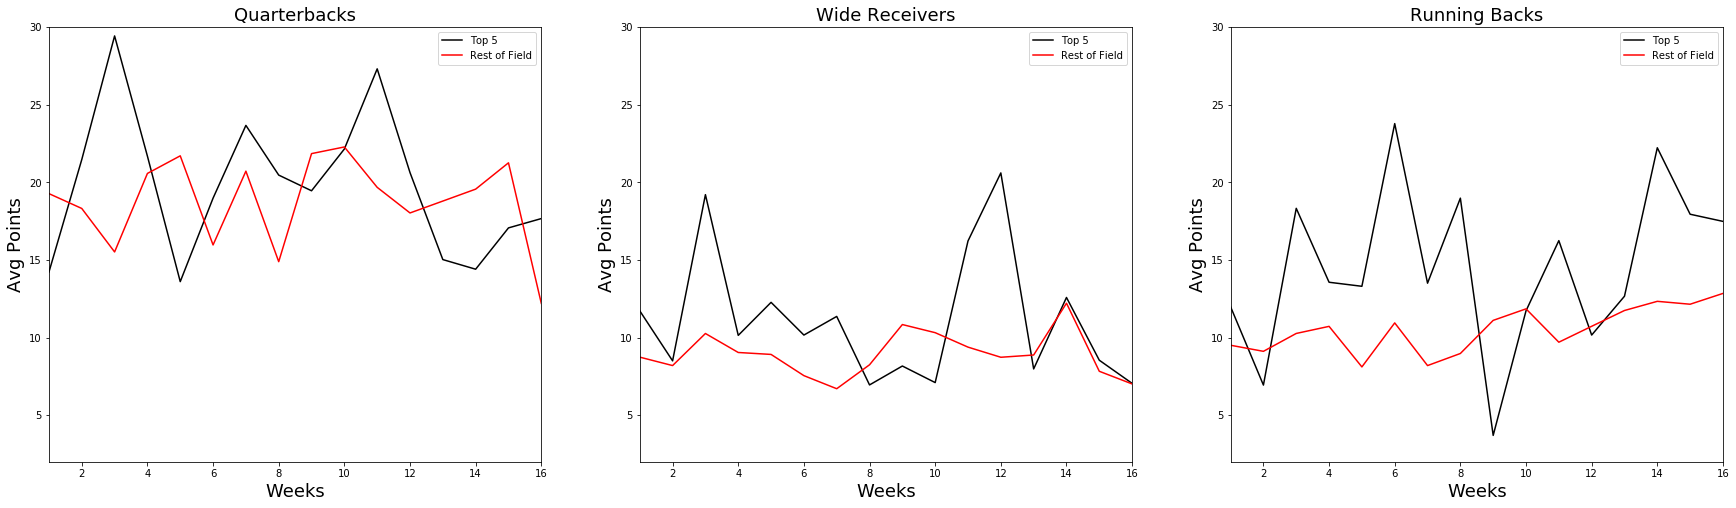

In [28]:
fig = plt.figure(figsize = (30,8))
subqb = fig.add_subplot(131)
subwr = fig.add_subplot(132)
subrb = fig.add_subplot(133)



subqb.plot(range(1,17),T5QBSAvg, color = 'black', label='Top 5')
subqb.plot(range(1,17),TFQBSAvg, color = 'red', label = 'Rest of Field' )
subqb.set_xlabel('Weeks', size = 18)
subqb.set_ylabel('Avg Points', size = 18)
subqb.set_title('Quarterbacks', size = 18)
subqb.set_ylim(2,30)
subqb.set_xlim(1,16)
subqb.legend(loc = 'best')

subwr.plot(range(1,17),T5WRSAvg, color = 'black', label='Top 5')
subwr.plot(range(1,17),TFWRSAvg, color = 'red', label = 'Rest of Field' )
subwr.set_xlabel('Weeks', size = 18)
subwr.set_ylabel('Avg Points', size = 18)
subwr.set_title('Wide Receivers', size = 18)
subwr.set_ylim(2,30)
subwr.set_xlim(1,16)
subwr.legend(loc = 'best')


subrb.plot(range(1,17),T5RBSAvg, color = 'black', label='Top 5')
subrb.plot(range(1,17),TFRBSAvg, color = 'red', label = 'Rest of Field' )
subrb.set_xlabel('Weeks', size = 18)
subrb.set_ylabel('Avg Points', size = 18)
subrb.set_title('Running Backs', size = 18)
subrb.set_ylim(2,30)
subrb.set_xlim(1,16)
subrb.legend(loc = 'best')




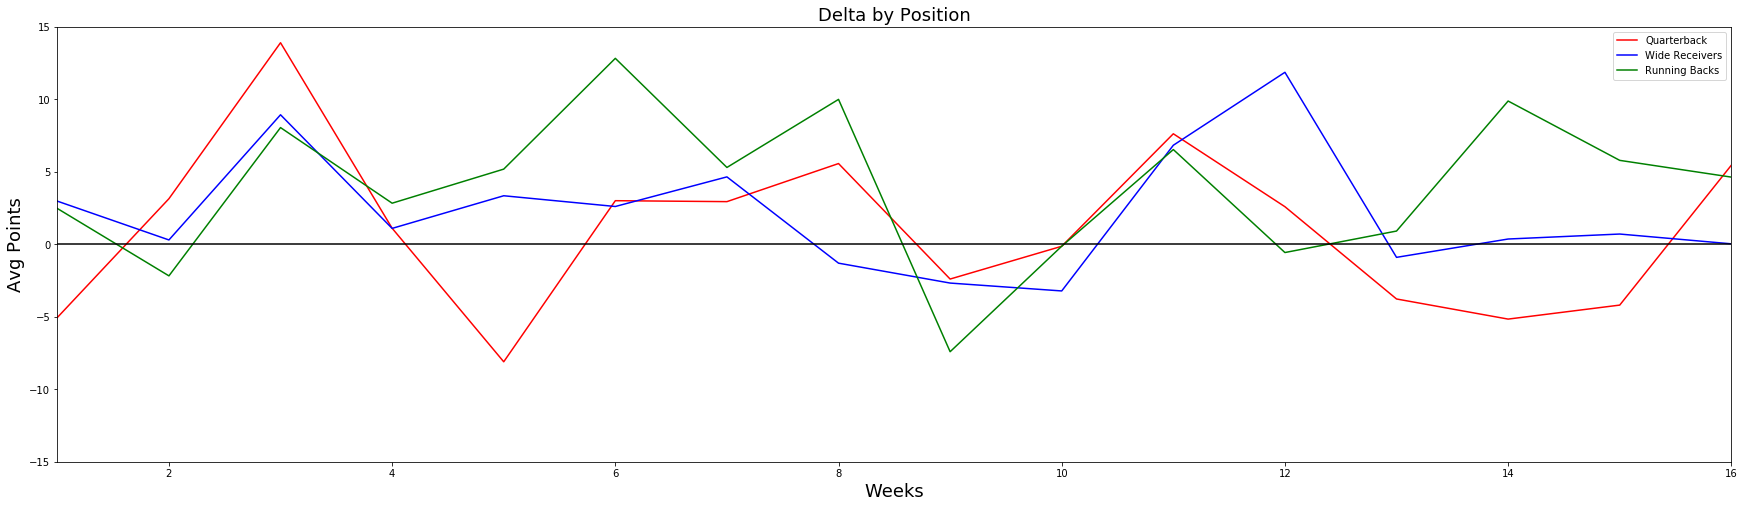

In [51]:
fig2 = plt.figure(figsize = (30,8))
subdelta = fig2.add_subplot(111)
#print(T5QBSAvg,TFQBSAvg)
#print(np.subtract(np.array(T5QBSAvg), np.array(TFQBSAvg)))
subdelta.plot(range(1,17),np.subtract(np.array(T5QBSAvg), np.array(TFQBSAvg)), color = 'red', label = 'Quarterback')
subdelta.plot(range(1,17),np.subtract(np.array(T5WRSAvg), np.array(TFWRSAvg)), color = 'blue', label = 'Wide Receivers')
subdelta.plot(range(1,17),np.subtract(np.array(T5RBSAvg), np.array(TFRBSAvg)), color = 'green', label = 'Running Backs')


subdelta.set_xlabel('Weeks', size = 18)
subdelta.set_ylabel('Avg Points', size = 18)
subdelta.set_title('Delta by Position', size = 18)
subdelta.set_ylim(-15,15)
subdelta.set_xlim(1,16)
subdelta.legend(loc = 'best')
subdelta.axhline(y=0.0, color = 'black')

1.0379836309523789

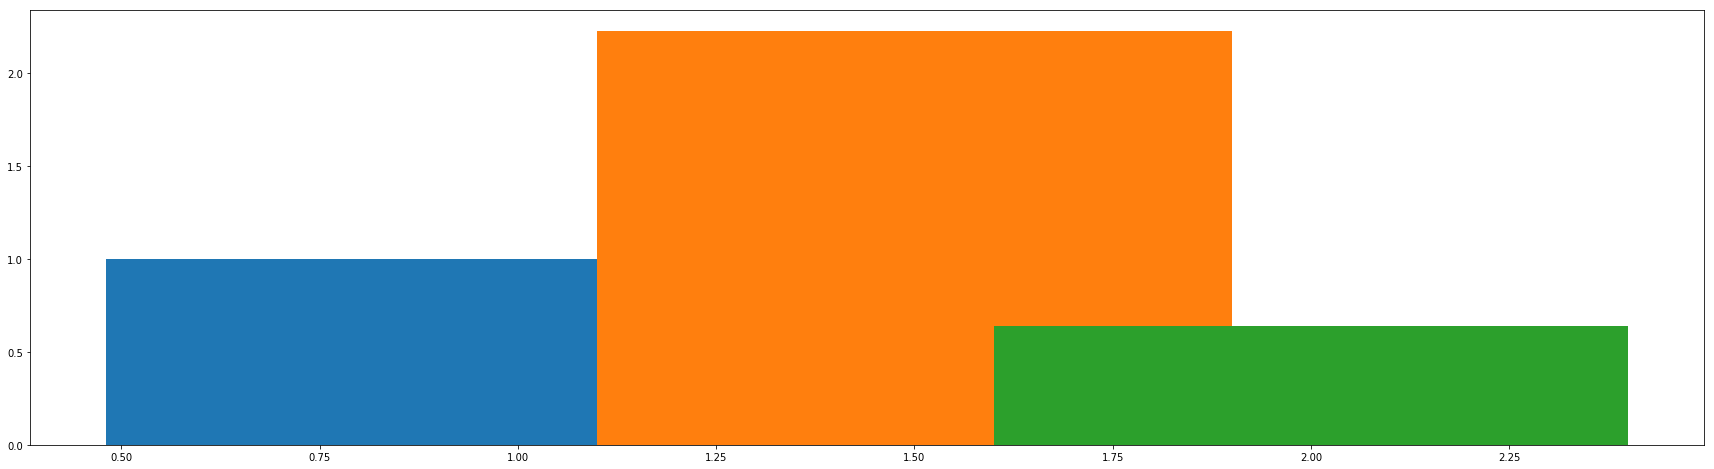

In [66]:
fig2 = plt.figure(figsize = (30,8))
subdelta = fig2.add_subplot(111)
#print(T5QBSAvg,TFQBSAvg)
#print(np.subtract(np.array(T5QBSAvg), np.array(TFQBSAvg)))
subdelta.bar(1,1,(np.mean(T5QBSAvg) - np.mean(TFQBSAvg)))
subdelta.bar(1.5,(np.mean(T5WRSAvg) - np.mean(TFWRSAvg)))
subdelta.bar(2,(np.mean(T5WRSAvg) - np.mean(TFRBSAvg)))
(np.mean(T5QBSAvg) - np.mean(TFQBSAvg))
(np.mean(T5QBSAvg) - np.mean(TFQBSAvg))
(np.mean(T5QBSAvg) - np.mean(TFQBSAvg))

In [63]:
plt.bar?

In [33]:
dfqb.iloc[:5]


,player,position,avgrank,overallrank,positionrank,Wk1,Wk2,Wk3,Wk4,Wk5,...,Wk7,Wk8,Wk9,Wk10,Wk11,Wk12,Wk13,Wk14,Wk15,Wk16
24,Tom Brady,QB,45.4,44,1,12,34.7,40.3,23.1,14.2,...,20.8,19.7,0,25.5,28.9,23.3,9.4,10.5,17.7,17.5
26,Drew Brees,QB,55.8,57,3,17.6,25.1,23.4,21.4,0,...,21.6,13.3,21.1,15.7,24.3,16.2,16.3,19.2,19.3,12.6
27,Matt Ryan,QB,71.0,67,4,20.2,16.8,15.4,9.6,0,...,19.2,17.9,20.8,16.5,19.2,18.9,7.9,7.7,17.3,16
28,Russell Wilson,QB,85.0,79,5,9.4,17.3,37.8,31.1,13,...,29.7,39.5,26.6,21.9,34.8,26.6,27.3,24.6,13.1,16.5
29,Kirk Cousins,QB,90.2,89,6,11.9,13.4,30.2,23.2,0,...,27,11.9,9.3,31.1,29.3,18.1,14.2,10,17.9,25.7


In [70]:
# QB Establish bins
bins = [0,5,21]
bin_names = ["top 5","field"]

#Categorize the QBs using the position rank bins
grouped_QB = dfqb.groupby(pd.cut(dfqb["positionrank"],bins,labels=bin_names))

#QB Weekly Summary Table
QB_Weekly_Summary=pd.DataFrame({"Week 1":grouped_QB["Wk1"].max(),
                               "Week 2":grouped_QB["Wk2"].max(),
                               "Week 3":grouped_QB["Wk3"].max(),
                               "Week 4":grouped_QB["Wk4"].max(),
                               "Week 5":grouped_QB["Wk5"].max(),
                               "Week 6":grouped_QB["Wk6"].max(),
                               "Week 7":grouped_QB["Wk7"].max(),
                               "Week 8":grouped_QB["Wk8"].max(),
                               "Week 9":grouped_QB["Wk9"].max(),
                               "Week 10":grouped_QB["Wk10"].max(),
                               "Week 11":grouped_QB["Wk11"].max(),
                               "Week 12":grouped_QB["Wk12"].max(),
                               "Week 13":grouped_QB["Wk13"].max(),
                               "Week 14":grouped_QB["Wk14"].max(),
                               "Week 15":grouped_QB["Wk15"].max(),
                               "Week 16":grouped_QB["Wk16"].max(),})

display(QB_Weekly_Summary)

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15,Week 16
positionrank,,,,,,,,,,,,,,,,
top 5,20.2,34.7,40.3,31.1,14.2,18.2,29.7,39.5,26.6,25.5,34.8,26.6,27.3,24.6,19.3,17.5
field,30.5,28.0,30.2,37.2,33.5,31.3,35.0,20.3,30.0,40.2,32.6,34.4,23.0,32.4,35.5,25.7


In [71]:
dfwr.iloc[:5]

,player,position,avgrank,overallrank,positionrank,Wk1,Wk2,Wk3,Wk4,Wk5,...,Wk7,Wk8,Wk9,Wk10,Wk11,Wk12,Wk13,Wk14,Wk15,Wk16
127,Antonio Brown,WR,3.0,3,1,20.5,7,19.2,3.8,17.7,...,14.1,7.9,0,5.3,36.5,34.8,18.1,24,2.7,0
129,Julio Jones,WR,5.6,6,3,7.4,12.2,10.3,3.4,0,...,17.9,8.3,13.3,6.4,8,43.7,2.7,11,6.1,16.8
130,Jordy Nelson,WR,7.4,7,4,15.7,0,19.4,22,9.5,...,1.5,0,3.9,2.3,2.7,1.2,1.9,3.7,3.2,1.2
133,Michael Thomas,WR,10.6,11,7,5.1,10,16.6,16.8,0,...,9.2,8.7,7.3,13.2,10.3,5.9,14.7,19.9,17.2,7.4
134,Brandin Cooks,WR,14.6,14,8,9.9,4.8,30.5,4.7,9.6,...,14.1,2.9,0,8.3,23.6,17.4,2.5,4.3,13.5,2.8


In [23]:
#WR Establish bins
#Used Top 6 WRs due to ODell Beckham Jr. being out the entire season
bins = [0,6,60]
bin_names = ["top 5","field"]

#Categorize the WRs using the position rank bins
grouped_WR = dfwr.groupby(pd.cut(dfwr["positionrank"],bins,labels=bin_names))

#WR Weekly Summary Table
WR_Weekly_Summary=pd.DataFrame({"Week 1":grouped_WR["Wk1"].max(),
                               "Week 2":grouped_WR["Wk2"].max(),
                               "Week 3":grouped_WR["Wk3"].max(),
                               "Week 4":grouped_WR["Wk4"].max(),
                               "Week 5":grouped_WR["Wk5"].max(),
                               "Week 6":grouped_WR["Wk6"].max(),
                               "Week 7":grouped_WR["Wk7"].max(),
                               "Week 8":grouped_WR["Wk8"].max(),
                               "Week 9":grouped_WR["Wk9"].max(),
                               "Week 10":grouped_WR["Wk10"].max(),
                               "Week 11":grouped_WR["Wk11"].max(),
                               "Week 12":grouped_WR["Wk12"].max(),
                               "Week 13":grouped_WR["Wk13"].max(),
                               "Week 14":grouped_WR["Wk14"].max(),
                               "Week 15":grouped_WR["Wk15"].max(),
                               "Week 16":grouped_WR["Wk16"].max(),})

display(WR_Weekly_Summary)

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15,Week 16
positionrank,,,,,,,,,,,,,,,,
top 5,20.5,17.2,19.4,22.0,17.7,24.2,17.9,8.3,13.3,6.4,36.5,43.7,18.1,24.0,15.7,16.8
field,23.3,29.3,33.0,19.7,26.1,20.1,37.2,32.0,23.0,25.5,31.8,26.1,34.4,28.1,22.4,21.1


In [24]:
# WB Establish bins
bins = [0,5,21]
bin_names = ["top 5","field"]

#Categorize the existing players using the age bins
grouped_QB = dfqb.groupby(pd.cut(dfqb["positionrank"],bins,labels=bin_names))

#Calculation and Summary Table Format
QB_Weekly_Summary=pd.DataFrame({"Week 1":grouped_QB["Wk1"].max(),
                               "Week 2":grouped_QB["Wk2"].max(),
                               "Week 3":grouped_QB["Wk3"].max(),
                               "Week 4":grouped_QB["Wk4"].max(),
                               "Week 5":grouped_QB["Wk5"].max(),
                               "Week 6":grouped_QB["Wk6"].max(),
                               "Week 7":grouped_QB["Wk7"].max(),
                               "Week 8":grouped_QB["Wk8"].max(),
                               "Week 9":grouped_QB["Wk9"].max(),
                               "Week 10":grouped_QB["Wk10"].max(),
                               "Week 11":grouped_QB["Wk11"].max(),
                               "Week 12":grouped_QB["Wk12"].max(),
                               "Week 13":grouped_QB["Wk13"].max(),
                               "Week 14":grouped_QB["Wk14"].max(),
                               "Week 15":grouped_QB["Wk15"].max(),
                               "Week 16":grouped_QB["Wk16"].max(),})

#Display Age Demographics Table
display(QB_Weekly_Summary)

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15,Week 16
positionrank,,,,,,,,,,,,,,,,
top 5,20.2,34.7,40.3,31.1,27.1,18.2,29.7,39.5,26.6,25.5,34.8,26.6,27.3,24.6,24.7,17.5
field,30.5,28.0,30.2,37.2,33.5,31.3,35.0,21.1,30.3,40.2,32.6,34.4,23.0,32.4,35.5,25.7


In [25]:
dfrb.iloc[:5]

,player,position,avgrank,overallrank,positionrank,Wk1,Wk2,Wk3,Wk4,Wk5,...,Wk7,Wk8,Wk9,Wk10,Wk11,Wk12,Wk13,Wk14,Wk15,Wk16
44,David Johnson,RB,1.6,1,1,7.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,Le'Veon Bell,RB,1.8,2,2,5.3,10.3,17.8,34.5,10.5,...,21.6,13.6,0,12.6,11.6,18.4,27.3,34.4,25.4,17.7
46,Ezekiel Elliott,RB,4.6,4,3,15.8,2.5,17.4,29.2,14.9,...,45,28.6,17.2,0,0,0,0,0,0,13.3
47,LeSean McCoy,RB,9.4,9,4,17.9,4.8,7.8,12.2,10,...,25,26.3,2.8,6.8,27.7,8.9,11.5,24.3,24.3,16.6
48,Devonta Freeman,RB,10.8,12,5,11.2,24.8,22.3,15.6,0,...,10.1,6.9,7.2,0.3,0,0,9.1,17,28.6,4.1


In [26]:
#RB Establish bins
bins = [0,5,60]
bin_names = ["top 5","field"]

#Categorize the RBs using the position rank bins
grouped_RB = dfrb.groupby(pd.cut(dfrb["positionrank"],bins,labels=bin_names))

#RB Weekly Summary Table
RB_Weekly_Summary=pd.DataFrame({"Week 1":grouped_RB["Wk1"].max(),
                               "Week 2":grouped_RB["Wk2"].max(),
                               "Week 3":grouped_RB["Wk3"].max(),
                               "Week 4":grouped_RB["Wk4"].max(),
                               "Week 5":grouped_RB["Wk5"].max(),
                               "Week 6":grouped_RB["Wk6"].max(),
                               "Week 7":grouped_RB["Wk7"].max(),
                               "Week 8":grouped_RB["Wk8"].max(),
                               "Week 9":grouped_RB["Wk9"].max(),
                               "Week 10":grouped_RB["Wk10"].max(),
                               "Week 11":grouped_RB["Wk11"].max(),
                               "Week 12":grouped_RB["Wk12"].max(),
                               "Week 13":grouped_RB["Wk13"].max(),
                               "Week 14":grouped_RB["Wk14"].max(),
                               "Week 15":grouped_RB["Wk15"].max(),
                               "Week 16":grouped_RB["Wk16"].max(),})

display(RB_Weekly_Summary)

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15,Week 16
positionrank,,,,,,,,,,,,,,,,
top 5,17.9,24.8,22.3,34.5,14.9,28.3,45.0,28.6,17.2,12.6,27.7,18.4,27.3,34.4,28.6,17.7
field,45.8,26.6,37.1,31.0,34.3,30.4,24.1,22.4,28.4,35.0,24.3,34.7,27.7,31.9,47.3,44.6
